<a href="https://colab.research.google.com/github/soumik12345/Zero-DCE/blob/master/Zero_DCE_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Nov 14 10:20:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/soumik12345/Zero-DCE
%cd Zero-DCE

Cloning into 'Zero-DCE'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 37 (delta 17), reused 27 (delta 9), pack-reused 0
Unpacking objects: 100% (37/37), done.
/content/Zero-DCE


In [3]:
!pip install -qq wandb

     |████████████████████████████████| 1.8MB 9.1MB/s 
     |████████████████████████████████| 163kB 27.9MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 133kB 25.0MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 


In [4]:
from glob import glob
from zero_dce import download_dataset, init_wandb, Trainer

In [5]:
download_dataset()

Downloading...
From: https://drive.google.com/uc?id=1HiLtYiyT9R7dR9DRTLRlUUrAicC4zzWN
To: /content/Zero-DCE/Dataset_Part1.rar
4.16GB [01:12, 57.7MB/s]


Unpacking Dataset
Done!!!


In [6]:
init_wandb(
    project_name='zero-dce', experiment_name='lowlight_experiment',
    wandb_api_key='4c77a6750a931c1b13d4d10a0e058725a7487ba9'
)

wandb: Currently logged in as: 19soumik-rakshit96 (use `wandb login --relogin` to force relogin)


In [7]:
trainer = Trainer()
image_files = glob('./Dataset_Part1/*/*.JPG')[:128]
trainer.build_dataloader(image_files)
trainer.build_model()

In [8]:
trainer.train(epochs=100, log_frequency=200)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/Zero-DCE/zero_dce/trainer.py:53: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.model.parameters(), 0.1)



Epoch 2/100



Epoch 3/100



Epoch 4/100



Epoch 5/100



Epoch 6/100



Epoch 7/100



Epoch 8/100



Epoch 9/100



Epoch 10/100



Epoch 11/100



Epoch 12/100



Epoch 13/100



Epoch 14/100



Epoch 15/100



Epoch 16/100



Epoch 17/100



Epoch 18/100



Epoch 19/100



Epoch 20/100



Epoch 21/100



Epoch 22/100



Epoch 23/100



Epoch 24/100



Epoch 25/100



Epoch 26/100



Epoch 27/100



Epoch 28/100



Epoch 29/100



Epoch 30/100



Epoch 31/100



Epoch 32/100



Epoch 33/100



Epoch 34/100



Epoch 35/100



Epoch 36/100



Epoch 37/100



Epoch 38/100



Epoch 39/100



Epoch 40/100



Epoch 41/100



Epoch 42/100



Epoch 43/100



Epoch 44/100



Epoch 45/100



Epoch 46/100



Epoch 47/100



Epoch 48/100



Epoch 49/100



Epoch 50/100



Epoch 51/100



Epoch 52/100



Epoch 53/100



Epoch 54/100



Epoch 55/100



Epoch 56/100



Epoch 57/100



Epoch 58/100



Epoch 59/100



Epoch 60/100



Epoch 61/100



Epoch 62/100



Epoch 63/100



Epoch 64/100



Epoch 65/100



Epoch 66/100



Epoch 67/100



Epoch 68/100



Epoch 69/100



Epoch 70/100



Epoch 71/100



Epoch 72/100



Epoch 73/100



Epoch 74/100



Epoch 75/100



Epoch 76/100



Epoch 77/100



Epoch 78/100



Epoch 79/100



Epoch 80/100



Epoch 81/100



Epoch 82/100



Epoch 83/100



Epoch 84/100



Epoch 85/100



Epoch 86/100



Epoch 87/100



Epoch 88/100



Epoch 89/100



Epoch 90/100



Epoch 91/100



Epoch 92/100



Epoch 93/100



Epoch 94/100



Epoch 95/100



Epoch 96/100



Epoch 97/100



Epoch 98/100



Epoch 99/100



Epoch 100/100


In [9]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [35]:
def plot_image(image, enhanced):
    fig = plt.figure(figsize=(12, 12))
    fig.add_subplot(1, 2, 1).set_title('Original Image')
    imgplot = plt.imshow(image)
    fig.add_subplot(1, 2, 2).set_title('Enhanced Image')
    imgplot = plt.imshow(enhanced)
    plt.show()

In [41]:
def infer(model, image_path):
    with torch.no_grad():
        image_lowlight = Image.open(image_path)
        lowlight = (np.asarray(image_lowlight) / 255.0)
        lowlight = torch.from_numpy(lowlight).float()
        lowlight = lowlight.permute(2, 0, 1)
        lowlight = lowlight.unsqueeze(0)
        model = model.cpu()
        _, enhanced, _ = model(lowlight)
        enhanced = enhanced.squeeze().permute(1, 2, 0)        
    return image_lowlight, enhanced.numpy()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


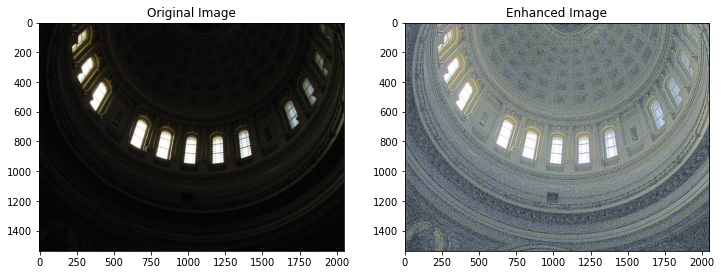

In [ ]:
for image_file in image_files[:5]:
    image, enhanced = infer(trainer.model, image_file)
    plot_image(image, enhanced)